# 개별 모델링 

In [3]:
#모듈 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Input,Reshape,Dropout
from tensorflow.keras.regularizers import l1, l2, L1L2 

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16

# 데이터 호출 

In [5]:
import pandas as pd 
import numpy as np 

In [ ]:
df_x0 = pd.read_pickle('/content/drive/MyDrive/데이터 보관/웨이퍼/df_x0')

In [ ]:
df_y0 = pd.read_pickle('/content/drive/MyDrive/데이터 보관/웨이퍼/df_y0')

# 데이터 전처리 

## reshape
- 데이터를 분할 해 저장할 때 45,45 를 45*45로 저장했으므로 이를 다시 reshape

In [ ]:
raw_x = df_x0.reshape(-1,45,45)

8


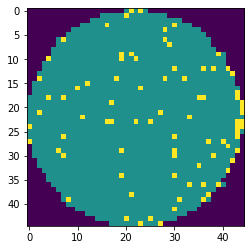

In [ ]:
import matplotlib.pyplot as plt 
plt.imshow(raw_x[1])
print(df_y0[1])

## normalization
- 웨이퍼의 이미지 데이터는 0,1,2로 만 이루어져 있으므로 /2를 통해 normalization

In [ ]:
x = raw_x/2.

In [ ]:
y = np.array(df_y0)
y = y.reshape(-1,1)

#x,y 분할 

In [ ]:
from sklearn.model_selection import train_test_split 
train_x, test_x, train_y, test_y = train_test_split(x,y,random_state=42)

#model

## Batch_size 확인
- acc 가 가장 높은 32 선택 

In [ ]:
for i in (2,4,8,16,32,64,128,256,512,1024,2048):
 # DNN 
  model = keras.Sequential()

  model.add(Input((45,45)))
  model.add(Flatten())
  model.add(Dense(10,activation = 'relu'))
  model.add(Dense(10,activation = 'relu'))
  model.add(Dense(10,activation = 'relu'))
  model.add(Dense(9, activation = 'softmax'))

  model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

  history = model.fit(train_x, train_y, epochs = 1,batch_size=i, verbose = 1)

  loss, acc = model.evaluate(test_x,test_y)
  print(f'loss={loss}')
  print(f'acc = {acc}')

271/271 [==============================] - 1s 2ms/step - loss: 1.4453 - accuracy: 0.4943
loss=1.4452909231185913
acc = 0.494333952665329
271/271 [==============================] - 1s 2ms/step - loss: 1.4456 - accuracy: 0.4943
loss=1.445605993270874
acc = 0.494333952665329
271/271 [==============================] - 90s 2ms/step - loss: 1.4455 - accuracy: 0.4943
loss=1.4455188512802124
acc = 0.494333952665329
271/271 [==============================] - 1s 2ms/step - loss: 0.5280 - accuracy: 0.8482
loss=0.5279896855354309
acc = 0.8481729626655579
271/271 [==============================] - 1s 2ms/step - loss: 0.5623 - accuracy: 0.8459
loss=0.5623493790626526
acc = 0.8458603024482727
271/271 [==============================] - 1s 2ms/step - loss: 0.7513 - accuracy: 0.8062
loss=0.7513307929039001
acc = 0.8061979413032532
271/271 [==============================] - 1s 2ms/step - loss: 1.2725 - accuracy: 0.4939
loss=1.272464632987976
acc = 0.49387142062187195
271/271 [============================

## 콜백

In [ ]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e
# loss 실시간 출력 
from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

    #call backs 선언
plot_losses = PlotLosses()

from tensorflow.keras.callbacks import ModelCheckpoint #<- model 저장 객체, best_model.h5라는 모델 이 저장 됨 
model_check_point = ModelCheckpoint(
    'best_model.h5', 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True)


from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터링 대상, 이걸 기준으로 멈춤 
    verbose=1,
    patience=50)         # 중지까지의 여유분

from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', # 모니터링 대상
    patience=25,        # 대상 기간동안 유지
    factor=0.2,         # 줄이는 양                              
    min_learning_rate=0.00001)     # 최소 학습율


#아래 이것만 설정 해주면 됨, [] 안에 사용할 것만 넣어서 쓰면 됨 
# callbacks = [model_check_point, plot_losses, early_stopping, reduce_lr]
callbacks = [plot_losses]

## DNN

In [ ]:
#모듈 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Input,Reshape,Dropout
from tensorflow.keras.regularizers import l1, l2, L1L2 

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications import VGG16

In [ ]:
train_y.shape

(25942, 1)

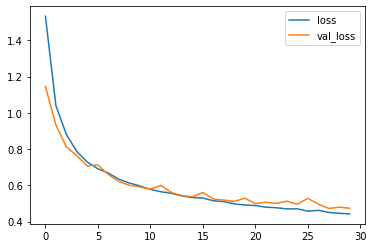

loss =  0.4424166977405548 , val_loss =  0.47379037737846375
271/271 [==============================] - 1s 2ms/step - loss: 0.4811 - accuracy: 0.8623
loss=0.4811294674873352
acc = 0.8622803092002869


In [ ]:
# DNN 
model = keras.Sequential()

model.add(Input((45,45)))
model.add(Flatten())
model.add(Dense(10,activation = 'relu'))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(9, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x, train_y, epochs = 30,batch_size=128, verbose = 1, validation_split = 0.2,callbacks = callbacks)

loss, acc = model.evaluate(test_x,test_y)
print(f'loss={loss}')
print(f'acc = {acc}')

## 예측 확인 

In [ ]:
y_ = model.predict(test_x)
np.argmax(y_,axis=1)

array([8, 0, 2, ..., 0, 4, 3])

# 모델 튜닝 

##1. kernel initialize <- 성능은 매우 떨어지지만 오버피팅에서 조금 완화 

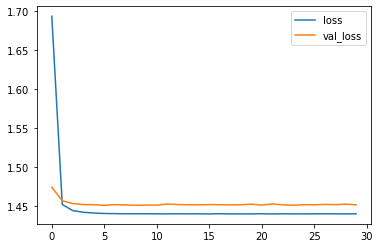

loss =  1.4401545524597168 , val_loss =  1.451712965965271
271/271 [==============================] - 1s 2ms/step - loss: 1.4451 - accuracy: 0.4943
loss=1.4451344013214111
acc = 0.494333952665329


In [ ]:
# DNN 
model = keras.Sequential()

model.add(Input((45,45)))
model.add(Flatten())
model.add(Dense(10,activation = 'relu',kernel_initializer= 'he_normal'))
model.add(Dense(10,activation = 'relu',kernel_initializer= 'he_normal'))
model.add(Dense(10,activation = 'relu',kernel_initializer= 'he_normal'))
model.add(Dense(9, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x, train_y, epochs = 30,batch_size =32, verbose = 1, validation_split = 0.2,callbacks = callbacks)

loss, acc = model.evaluate(test_x,test_y)
print(f'loss={loss}')
print(f'acc = {acc}')

##2. Dropout <- 성능 하락이 너무 커서 제외 

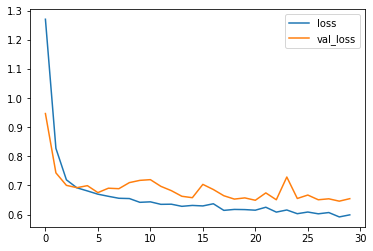

loss =  0.5989304780960083 , val_loss =  0.6545221209526062
271/271 [==============================] - 1s 2ms/step - loss: 0.6462 - accuracy: 0.8269
loss=0.646247923374176
acc = 0.8268963694572449


In [ ]:
# DNN 
model = keras.Sequential()

model.add(Input((45,45)))
model.add(Flatten())
model.add(Dense(10,activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(10,activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(9, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x, train_y, epochs = 30,batch_size=32, verbose = 1, validation_split = 0.2,callbacks = callbacks)

loss, acc = model.evaluate(test_x,test_y)
print(f'loss={loss}')
print(f'acc = {acc}')

## Batch Normalization - 성능은 향상 되지만 오버 피팅 정도가 커짐 

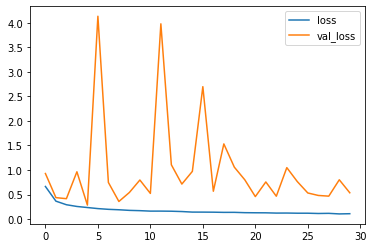

loss =  0.10972427576780319 , val_loss =  0.5358972549438477
271/271 [==============================] - 1s 2ms/step - loss: 0.5417 - accuracy: 0.8829
loss=0.5416843295097351
acc = 0.8828631043434143


In [ ]:
# DNN 
model = keras.Sequential()

model.add(Input((45,45)))
model.add(Flatten())
model.add(Dense(10,activation = 'relu'))
model.add(BatchNormalization()) # ADDED
model.add(Dense(10,activation = 'relu'))
model.add(BatchNormalization()) # ADDED
model.add(Dense(10,activation = 'relu'))
model.add(Dense(9, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x, train_y, epochs = 30,batch_size=32, verbose = 1, validation_split = 0.2,callbacks = callbacks)

loss, acc = model.evaluate(test_x,test_y)
print(f'loss={loss}')
print(f'acc = {acc}')

## Regularization <- 이거만 사용 







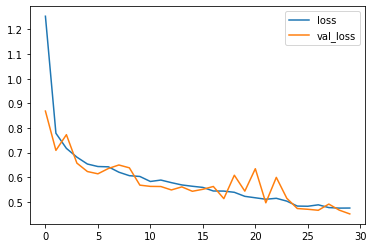

loss =  0.47528690099716187 , val_loss =  0.4514543116092682
271/271 [==============================] - 1s 2ms/step - loss: 0.4534 - accuracy: 0.8966
loss=0.4533662796020508
acc = 0.8966234922409058


In [ ]:
from tensorflow.keras.regularizers import l1, l2, L1L2 
# DNN 
model = keras.Sequential()

model.add(Input((45,45)))
model.add(Flatten())
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(9, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x, train_y, epochs = 30,batch_size=32, verbose = 1, validation_split = 0.2,callbacks = callbacks)

loss, acc = model.evaluate(test_x,test_y)
print(f'loss={loss}')
print(f'acc = {acc}')

## Batch Normalization + Regularization 

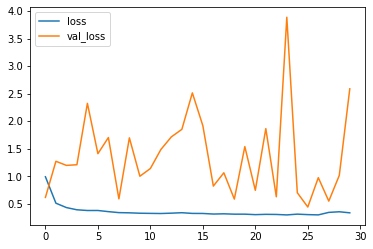

loss =  0.338657021522522 , val_loss =  2.5882718563079834
271/271 [==============================] - 1s 3ms/step - loss: 2.6655 - accuracy: 0.3861
loss=2.665534734725952
acc = 0.3861008286476135


In [ ]:
from tensorflow.keras.regularizers import l1, l2, L1L2 
# DNN 
model = keras.Sequential()

model.add(Input((45,45)))
model.add(Flatten())
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(BatchNormalization()) # ADDED
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(BatchNormalization()) # ADDED
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(9, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x, train_y, epochs = 30,batch_size=32, verbose = 1, validation_split = 0.2,callbacks = callbacks)

loss, acc = model.evaluate(test_x,test_y)
print(f'loss={loss}')
print(f'acc = {acc}')

##3. CNN

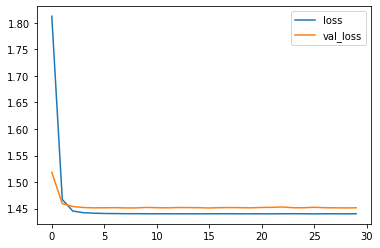

loss =  1.440266489982605 , val_loss =  1.4514926671981812
271/271 [==============================] - 1s 3ms/step - loss: 1.4451 - accuracy: 0.4943
loss=1.445067286491394
acc = 0.494333952665329


In [ ]:
# DNN 
model = keras.Sequential()

model.add(Input((45,45)))
model.add(Reshape((45,45,1)))
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용   
model.add(Flatten())
model.add(Dense(10,activation = 'relu'))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(9, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x, train_y, epochs = 30,batch_size = 64, verbose = 1, validation_split = 0.2,callbacks = callbacks)

loss, acc = model.evaluate(test_x,test_y)
print(f'loss={loss}')
print(f'acc = {acc}')

## CNN + batch 


In [ ]:
for i in (2,4,8,16,32,64,128,256,512,1024,2048):
 # DNN 
  model = keras.Sequential()

  model.add(Input((45,45)))
  model.add(Reshape((45,45,1)))
  model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
  model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
  model.add(Flatten())
  model.add(Dense(10,activation = 'relu'))
  model.add(Dense(10,activation = 'relu'))
  model.add(Dense(10,activation = 'relu'))
  model.add(Dense(9, activation = 'softmax'))

  model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

  history = model.fit(train_x, train_y, epochs = 1,batch_size=i, verbose = 1)

  loss, acc = model.evaluate(test_x,test_y)
  print(i)
  print(f'loss={loss}')
  print(f'acc = {acc}')

271/271 [==============================] - 1s 3ms/step - loss: 0.6478 - accuracy: 0.8145
2
loss=0.6477676033973694
acc = 0.8145235776901245
271/271 [==============================] - 1s 3ms/step - loss: 0.3478 - accuracy: 0.8960
4
loss=0.3478343188762665
acc = 0.8960453271865845
271/271 [==============================] - 1s 3ms/step - loss: 0.4823 - accuracy: 0.8432
8
loss=0.48232322931289673
acc = 0.8432007431983948
271/271 [==============================] - 1s 3ms/step - loss: 0.4442 - accuracy: 0.8681
16
loss=0.44420167803764343
acc = 0.8680619597434998
271/271 [==============================] - 1s 3ms/step - loss: 0.4223 - accuracy: 0.8712
32
loss=0.4223308861255646
acc = 0.8711841106414795
271/271 [==============================] - 1s 3ms/step - loss: 1.0061 - accuracy: 0.7168
64
loss=1.0061091184616089
acc = 0.7168131470680237
271/271 [==============================] - 1s 3ms/step - loss: 1.6013 - accuracy: 0.4943
128
loss=1.6012969017028809
acc = 0.494333952665329
271/271 [=====

## CNN + Regularization

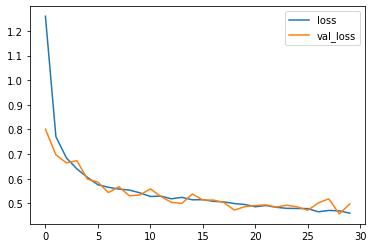

loss =  0.46047210693359375 , val_loss =  0.49810320138931274
271/271 [==============================] - 1s 3ms/step - loss: 0.4909 - accuracy: 0.8858
loss=0.49086815118789673
acc = 0.8857539296150208


In [ ]:
 
model = keras.Sequential()

model.add(Input((45,45)))
model.add(Reshape((45,45,1)))
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용   
model.add(Flatten())
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(9, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x, train_y, epochs = 30,batch_size = 32, verbose = 1, validation_split = 0.2,callbacks = callbacks)

loss, acc = model.evaluate(test_x,test_y)
print(f'loss={loss}')
print(f'acc = {acc}')

##CNN 2중 conv 64 64

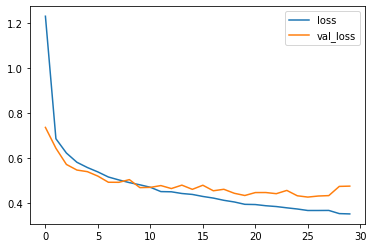

loss =  0.3506802022457123 , val_loss =  0.4742714762687683
271/271 [==============================] - 1s 3ms/step - loss: 0.4701 - accuracy: 0.8852
loss=0.47005748748779297
acc = 0.8851757645606995


In [ ]:
 
model = keras.Sequential()

model.add(Input((45,45)))
model.add(Reshape((45,45,1)))
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용   
model.add(Flatten())
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(9, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x, train_y, epochs = 30,batch_size = 32, verbose = 1, validation_split = 0.2,callbacks = callbacks)

loss, acc = model.evaluate(test_x,test_y)
print(f'loss={loss}')
print(f'acc = {acc}')

## CNN 2중 conv 64 32

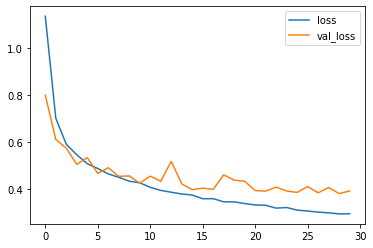

loss =  0.2964899241924286 , val_loss =  0.3931489884853363
271/271 [==============================] - 1s 3ms/step - loss: 0.3850 - accuracy: 0.9076
loss=0.38497015833854675
acc = 0.907608687877655


In [ ]:
 
model = keras.Sequential()

model.add(Input((45,45)))
model.add(Reshape((45,45,1)))
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(32, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용   
model.add(Flatten())
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(9, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x, train_y, epochs = 30,batch_size = 32, verbose = 1, validation_split = 0.2,callbacks = callbacks)

loss, acc = model.evaluate(test_x,test_y)
print(f'loss={loss}')
print(f'acc = {acc}')

##CNN 3중 conv 64 64 32 

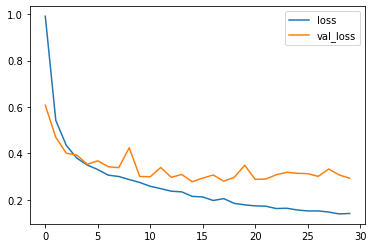

loss =  0.14141887426376343 , val_loss =  0.29353636503219604
271/271 [==============================] - 1s 4ms/step - loss: 0.2940 - accuracy: 0.9385
loss=0.2939693033695221
acc = 0.9384828805923462


In [ ]:
 
model = keras.Sequential()

model.add(Input((45,45)))
model.add(Reshape((45,45,1)))
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(32, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용   
model.add(Flatten())
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(9, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x, train_y, epochs = 30,batch_size = 32, verbose = 1, validation_split = 0.2,callbacks = callbacks)

loss, acc = model.evaluate(test_x,test_y)
print(f'loss={loss}')
print(f'acc = {acc}')

## CNN 3중 conv 64 64 32 + batch_size 64 <- 속도 향상, 오버피팅 감소, 성능 유사 하므로 이걸로 계속 진행 

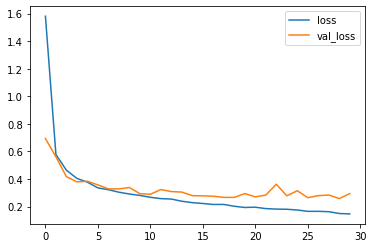

loss =  0.14638453722000122 , val_loss =  0.2937714159488678
271/271 [==============================] - 1s 4ms/step - loss: 0.3096 - accuracy: 0.9376
loss=0.30956122279167175
acc = 0.9375578165054321


In [ ]:
 
model = keras.Sequential()

model.add(Input((45,45)))
model.add(Reshape((45,45,1)))
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(32, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용   
model.add(Flatten())
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(9, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x, train_y, epochs = 30,batch_size = 64, verbose = 1, validation_split = 0.2,callbacks = callbacks)

loss, acc = model.evaluate(test_x,test_y)
print(f'loss={loss}')
print(f'acc = {acc}')

## CNN 3중 conv 64 64 32 32 + batch_size 64
- 성능은 유사한데 오버피팅이 심해지므로 파기 

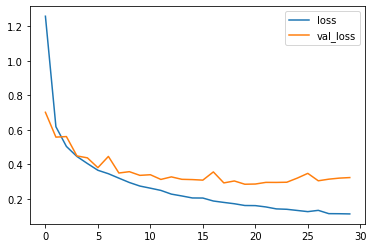

loss =  0.11179632693529129 , val_loss =  0.3227948844432831
271/271 [==============================] - 1s 4ms/step - loss: 0.3118 - accuracy: 0.9392
loss=0.3118126094341278
acc = 0.9391766786575317


In [ ]:
 
model = keras.Sequential()

model.add(Input((45,45)))
model.add(Reshape((45,45,1)))
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(32, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(32, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용   
model.add(Flatten())
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(9, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x, train_y, epochs = 30,batch_size = 64, verbose = 1, validation_split = 0.2,callbacks = callbacks)

loss, acc = model.evaluate(test_x,test_y)
print(f'loss={loss}')
print(f'acc = {acc}')

## CNN 4중 Conv 128 64 64 32 

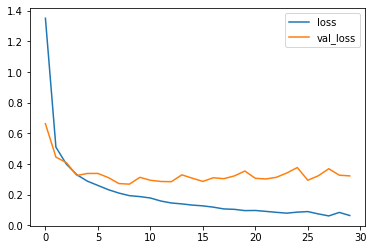

loss =  0.06383665651082993 , val_loss =  0.32195553183555603
271/271 [==============================] - 1s 4ms/step - loss: 0.3020 - accuracy: 0.9392
loss=0.30197638273239136
acc = 0.9391766786575317


In [ ]:
 
model = keras.Sequential()

model.add(Input((45,45)))
model.add(Reshape((45,45,1)))
model.add(Conv2D(128, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(32, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용   
model.add(Flatten())
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(9, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x, train_y, epochs = 30,batch_size = 64, verbose = 1, validation_split = 0.2,callbacks = callbacks)

loss, acc = model.evaluate(test_x,test_y)
print(f'loss={loss}')
print(f'acc = {acc}')

##CNN 5중 Conv 256 128 64 64 32 ****

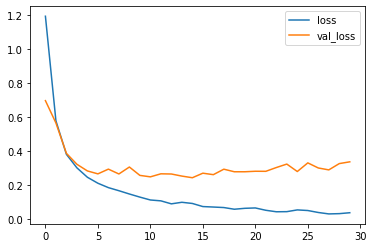

loss =  0.03820539265871048 , val_loss =  0.33801475167274475
271/271 [==============================] - 2s 6ms/step - loss: 0.3107 - accuracy: 0.9514
loss=0.31066617369651794
acc = 0.9514338374137878


In [ ]:
 
model = keras.Sequential()

model.add(Input((45,45)))
model.add(Reshape((45,45,1)))
model.add(Conv2D(256, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(128, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(32, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용   
model.add(Flatten())
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(9, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x, train_y, epochs = 30,batch_size = 64, verbose = 1, validation_split = 0.2,callbacks = callbacks)

loss, acc = model.evaluate(test_x,test_y)
print(f'loss={loss}')
print(f'acc = {acc}')

## CNN 5중 Conv 128 128 64 64 32

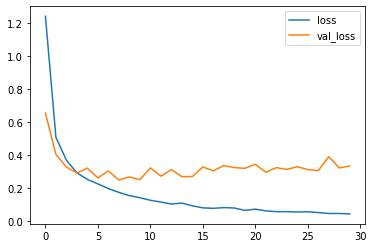

loss =  0.041500337421894073 , val_loss =  0.33183252811431885
271/271 [==============================] - 1s 4ms/step - loss: 0.3308 - accuracy: 0.9424
loss=0.33076542615890503
acc = 0.942414402961731


In [ ]:
 
model = keras.Sequential()

model.add(Input((45,45)))
model.add(Reshape((45,45,1)))
model.add(Conv2D(128, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(128, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(32, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용   
model.add(Flatten())
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(9, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x, train_y, epochs = 30,batch_size = 64, verbose = 1, validation_split = 0.2,callbacks = callbacks)

loss, acc = model.evaluate(test_x,test_y)
print(f'loss={loss}')
print(f'acc = {acc}')

## CNN 5중 Conv 128 64 64 64 32 

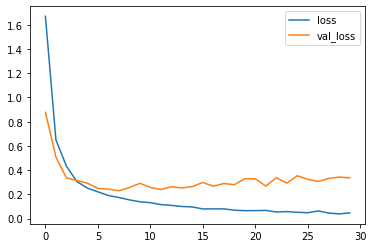

loss =  0.04641727730631828 , val_loss =  0.3360084593296051
271/271 [==============================] - 1s 4ms/step - loss: 0.3041 - accuracy: 0.9509
loss=0.30413326621055603
acc = 0.9508556723594666


In [ ]:


model = keras.Sequential()

model.add(Input((45,45)))
model.add(Reshape((45,45,1)))
model.add(Conv2D(128, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(32, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용   
model.add(Flatten())
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(9, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x, train_y, epochs = 30,batch_size = 64, verbose = 1, validation_split = 0.2,callbacks = callbacks)

loss, acc = model.evaluate(test_x,test_y)
print(f'loss={loss}')
print(f'acc = {acc}')

## CNN 5중 conv 128 64 64 32 32 

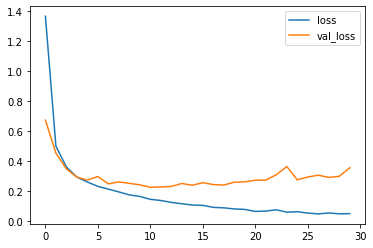

loss =  0.048973601311445236 , val_loss =  0.35486921668052673
271/271 [==============================] - 1s 4ms/step - loss: 0.3214 - accuracy: 0.9475
loss=0.3213869035243988
acc = 0.9475023150444031


In [ ]:
 
model = keras.Sequential()

model.add(Input((45,45)))
model.add(Reshape((45,45,1)))
model.add(Conv2D(128, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(32, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(32, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용   
model.add(Flatten())
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(9, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x, train_y, epochs = 30,batch_size = 64, verbose = 1, validation_split = 0.2,callbacks = callbacks)

loss, acc = model.evaluate(test_x,test_y)
print(f'loss={loss}')
print(f'acc = {acc}')

#제너레이터 이용 해서 모델 학습 진행

In [ ]:
model = keras.Sequential()

model.add(Input((45,45)))
model.add(Reshape((45,45,1)))
model.add(Conv2D(256, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(128, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(32, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용   
model.add(Flatten())
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(9, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_3 (Reshape)         (None, 45, 45, 1)         0         
                                                                 
 conv2d_15 (Conv2D)          (None, 45, 45, 256)       2560      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 22, 22, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 22, 22, 128)       295040    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 11, 11, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 64)       

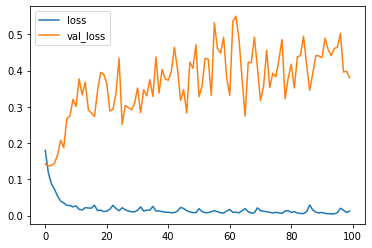

loss =  0.012579168193042278 , val_loss =  0.38009384274482727
271/271 [==============================] - 1s 4ms/step - loss: 0.3045 - accuracy: 0.9653
loss=0.3044780194759369
acc = 0.9653099179267883
time = 4
443.5573670864105
2184.648544549942


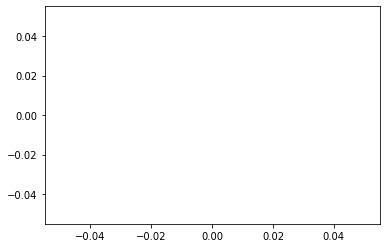

In [ ]:
loss_box = []
import time 
import matplotlib.pyplot as plt
start_time = time.time()
for i in range(5): 
  iteration_time = time.time()
  print(f'data batch = {i}')
  print('\n')
  #raw pkl 파일 호출 
  df_x0 = pd.read_pickle(f'/content/drive/MyDrive/데이터 보관/웨이퍼/df_x{i}')
  df_y0 = pd.read_pickle(f'/content/drive/MyDrive/데이터 보관/웨이퍼/df_y{i}')


  #x 파일 전처리 
  raw_x = df_x0.reshape(-1,45,45)
  raw_x = raw_x/2.
  #y 파일 전처리 

  y = np.array(df_y0)
  y = y.reshape(-1,1)

  from sklearn.model_selection import train_test_split 
  train_x, test_x, train_y, test_y = train_test_split(raw_x,y,random_state=42)


  model.fit(train_x, train_y, epochs = 100, batch_size = 64, verbose = 1, validation_split = 0.2,callbacks = callbacks)

  loss, acc = model.evaluate(test_x,test_y)
  print(f'loss={loss}')
  print(f'acc = {acc}') 
  print(f'time = {i}')
  print(time.time()-iteration_time)
  loss_box.append([i,loss,acc,time.time()-iteration_time])
  plt.plot()
print(time.time() - start_time)


In [ ]:
model.save('save.h5')

In [ ]:
!cp 'save.h5' '/content/drive/MyDrive/모델'

## 검증 

In [ ]:
import numpy as np
from numpy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

def draw_ROC_and_get_AUC(y_test, y_score, n_classes=9):

  y_test = np.eye(n_classes)[y_test]
  y_score = np.eye(n_classes)[y_score]

  # Plot linewidth.
  lw = 2

  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  # Compute macro-average ROC curve and ROC area

  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
      mean_tpr += interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  # Plot all ROC curves
  plt.figure(1)
  plt.plot(fpr["macro"], tpr["macro"],
          label='ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
          color='navy', linestyle=':', linewidth=4)

  colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
  for i, color in zip(range(n_classes), colors):
      plt.plot(fpr[i], tpr[i], color=color, lw=lw,
              label='ROC curve of class {0} (area = {1:0.2f})'
              ''.format(i, roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Some extension of Receiver operating characteristic to multi-class')
  plt.legend(loc="lower right")
  plt.show()

  return roc_auc["macro"]

In [ ]:
auc = draw_ROC_and_get_AUC(test_y, predicted, n_classes=9)
print("AUC ", auc)

In [ ]:
y_ = model.predict(test_x)
predicted = np.argmax(y_,axis=1)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, predicted)
print(cm)

[[   6    0    0    0    1    0    2    0   13]
 [   0    0    0    0    2    0    0    0    0]
 [   0    0   88   14    6    0    0   12   47]
 [   0    0    5   38    0    0    1    0   10]
 [   3    0    6    1   42    0    0   21   28]
 [   0    0    0    0    0    4    0    0    0]
 [   1    0    0    0    2    1    0    0    6]
 [   0    0    1    0    5    0    0   22   23]
 [   5    0   51    7    4    1    1   20 8148]]


In [ ]:
print(classification_report(test_y, predicted, target_names=['0','1','2','3','4','5','6','7','8']))

              precision    recall  f1-score   support

           0       0.40      0.27      0.32        22
           1       0.00      0.00      0.00         2
           2       0.58      0.53      0.55       167
           3       0.63      0.70      0.67        54
           4       0.68      0.42      0.52       101
           5       0.67      1.00      0.80         4
           6       0.00      0.00      0.00        10
           7       0.29      0.43      0.35        51
           8       0.98      0.99      0.99      8237

    accuracy                           0.97      8648
   macro avg       0.47      0.48      0.47      8648
weighted avg       0.96      0.97      0.96      8648



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


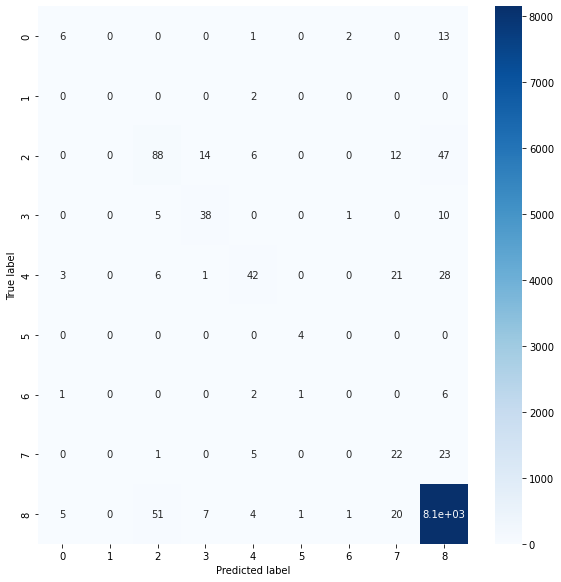

In [ ]:
import seaborn as sns

figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#normal 8번 데이터를 제외 한  불량 이미지만 갖고 진행 

In [ ]:
model = keras.Sequential()

model.add(Input((45,45)))
model.add(Reshape((45,45,1)))
model.add(Conv2D(256, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(128, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(32, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용   
model.add(Flatten())
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(9, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_4 (Reshape)         (None, 45, 45, 1)         0         
                                                                 
 conv2d_20 (Conv2D)          (None, 45, 45, 256)       2560      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 22, 22, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 22, 22, 128)       295040    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 11, 11, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 64)       

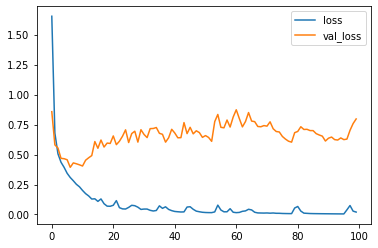

loss =  0.02014322020113468 , val_loss =  0.7964703440666199
200/200 [==============================] - 1s 4ms/step - loss: 0.7859 - accuracy: 0.8754
loss=0.7858913540840149
acc = 0.8753918409347534
time = 4
5626.087193250656
326.1420533657074


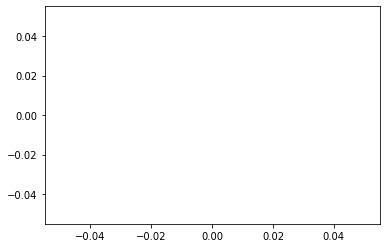

In [ ]:
loss_box = []
import time 
import matplotlib.pyplot as plt
start_time = time.time()


#raw pkl 파일 호출 
df_x0 = pd.read_pickle(f'/content/drive/MyDrive/데이터 보관/웨이퍼/df_x_no8')
df_y0 = pd.read_pickle(f'/content/drive/MyDrive/데이터 보관/웨이퍼/df_y_no8')


#x 파일 전처리 
raw_x = df_x0.reshape(-1,45,45)
raw_x = raw_x/2.
#y 파일 전처리 

y = np.array(df_y0)
y = y.reshape(-1,1)

from sklearn.model_selection import train_test_split 
train_x, test_x, train_y, test_y = train_test_split(raw_x,y,random_state=42)


model.fit(train_x, train_y, epochs = 100, batch_size = 64, verbose = 1, validation_split = 0.2,callbacks = callbacks)

loss, acc = model.evaluate(test_x,test_y)
print(f'loss={loss}')
print(f'acc = {acc}') 
print(f'time = {i}')
print(time.time()-iteration_time)
loss_box.append([i,loss,acc,time.time()-iteration_time])
plt.plot()
print(time.time() - start_time)


## 검증

In [ ]:
y_ = model.predict(test_x)
predicted = np.argmax(y_,axis=1)

In [ ]:
auc = draw_ROC_and_get_AUC(test_y, predicted, n_classes=9)
print("AUC ", auc)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, predicted)
print(cm)

[[1024    2    2    0   22    0    1    5]
 [   5  121    0    0   20    0    5    0]
 [  20    0 1009   47  135    0   18  100]
 [   2    0   77 2293    1    0    0    8]
 [  33   11   42    0  708    0    2  120]
 [   0    0    0    0    0   30    3    0]
 [   2    1    4    0   16    0  202    1]
 [   8    0   12    3   67    0    0  198]]


In [ ]:
print(classification_report(test_y, predicted, target_names=['0','1','2','3','4','5','6','7']))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1056
           1       0.90      0.80      0.85       151
           2       0.88      0.76      0.82      1329
           3       0.98      0.96      0.97      2381
           4       0.73      0.77      0.75       916
           5       1.00      0.91      0.95        33
           6       0.87      0.89      0.88       226
           7       0.46      0.69      0.55       288

    accuracy                           0.88      6380
   macro avg       0.84      0.84      0.84      6380
weighted avg       0.89      0.88      0.88      6380



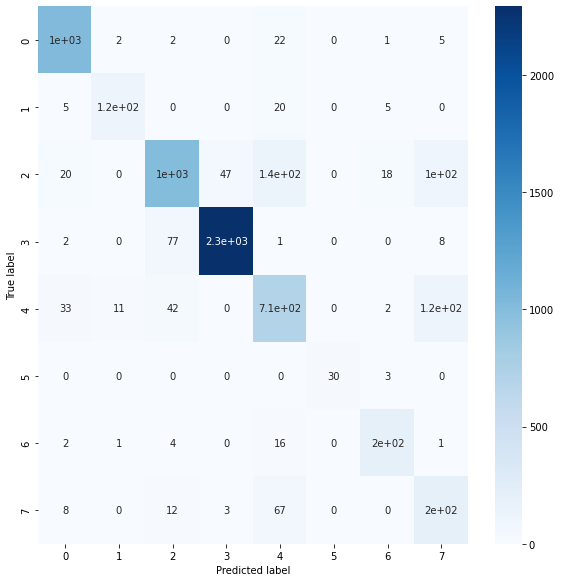

In [ ]:
import seaborn as sns

figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 회전 변형 이용 해서 진행 

## 회전 함수 

In [1]:
def rotate_img(image):
  image[image==1]=0
  image = image/4
  img90 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE) # 시계방향으로 90도 회전
  img180 = cv2.rotate(image, cv2.ROTATE_180) # 180도 회전
  img270 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
  image = image + img90 + img180 + img270
  return image

In [2]:
df_x0 = pd.read_pickle(f'/content/drive/MyDrive/데이터 보관/웨이퍼/df_x_no8')

NameError: ignored

In [ ]:
raw_x = df_x0.reshape(-1,45,45)

In [ ]:
temp = raw_x[5]

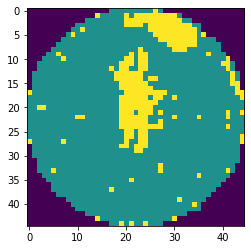

In [ ]:
plt.imshow(temp)

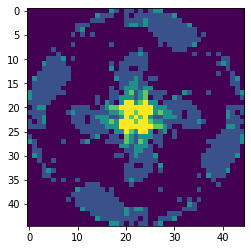

In [ ]:
plt.imshow(rotate_img(temp))

## 회전 함수로 진행 

### 데이터 생성 

In [6]:
df_x0 = pd.read_pickle(f'/content/drive/MyDrive/데이터 보관/웨이퍼/df_x_no8')
raw_x = df_x0.reshape(-1,45,45)

In [8]:
import cv2
x = []
for i in range(len(raw_x)):
  x.append(rotate_img(raw_x[i]))
x = np.array(x)
x = x/2.

In [9]:
df_y0 = pd.read_pickle(f'/content/drive/MyDrive/데이터 보관/웨이퍼/df_y_no8')
y = np.array(df_y0)
y = y.reshape(-1,1)

### 데이터 분할

In [ ]:
#데이터 분할 
from sklearn.model_selection import train_test_split 
train_x, test_x, train_y, test_y = train_test_split(x,y,random_state=42)

### 모델

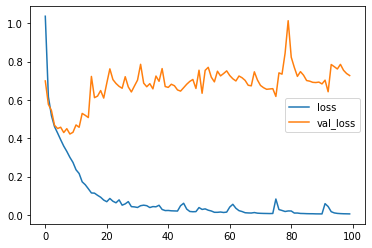

loss =  0.005444955080747604 , val_loss =  0.7274450063705444
200/200 [==============================] - 1s 4ms/step - loss: 0.7154 - accuracy: 0.8864
loss=0.7153822183609009
acc = 0.8863636255264282
time = 25518
8762.03586435318
451.33027148246765


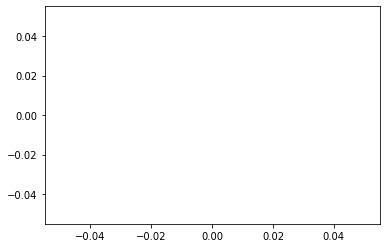

In [ ]:
model = keras.Sequential()

model.add(Input((45,45)))
model.add(Reshape((45,45,1)))
model.add(Conv2D(256, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(128, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
model.add(Conv2D(32, (3, 3), padding='same')) # ADDED
model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용   
model.add(Flatten())
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
model.add(Dense(9, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

model.fit(train_x, train_y, epochs = 100, batch_size = 64, verbose = 1, validation_split = 0.2,callbacks = callbacks)

loss, acc = model.evaluate(test_x,test_y)
print(f'loss={loss}')
print(f'acc = {acc}') 
print(f'time = {i}')
print(time.time()-iteration_time)
loss_box.append([i,loss,acc,time.time()-iteration_time])
print(time.time() - start_time)


## 검증

In [ ]:
y_ = model.predict(test_x)
predicted = np.argmax(y_,axis=1)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, predicted)
print(cm)

[[1014    4    6    1   19    0    3    9]
 [   4  126    0    0   17    0    4    0]
 [  11    0 1142   51   71    6   17   31]
 [   0    0   64 2309    1    0    0    7]
 [  37   10   98    1  679    1    6   84]
 [   0    0    0    0    0   33    0    0]
 [   2    1   12    1   19    2  187    2]
 [   8    1   23    4   86    0    1  165]]


In [ ]:
print(classification_report(test_y, predicted, target_names=['0','1','2','3','4','5','6','7']))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1056
           1       0.89      0.83      0.86       151
           2       0.85      0.86      0.85      1329
           3       0.98      0.97      0.97      2381
           4       0.76      0.74      0.75       916
           5       0.79      1.00      0.88        33
           6       0.86      0.83      0.84       226
           7       0.55      0.57      0.56       288

    accuracy                           0.89      6380
   macro avg       0.83      0.85      0.83      6380
weighted avg       0.89      0.89      0.89      6380



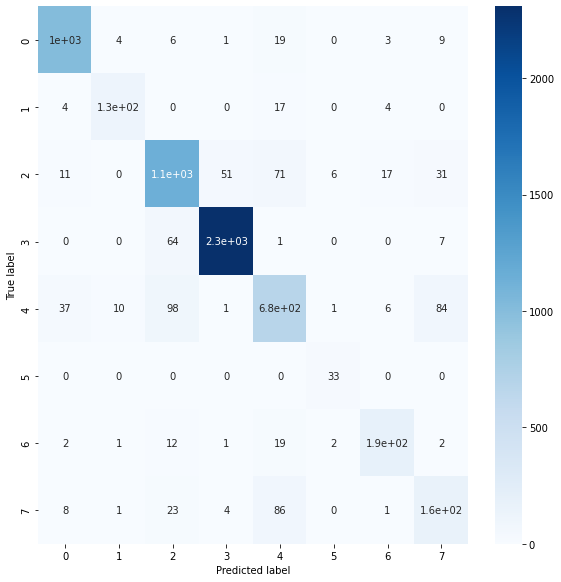

In [ ]:
import seaborn as sns

figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# cross validation 적용 
- kfold 없이 단독으로 할 경우 회전 이미지 모델의 acc 는 0.886


## 데이터 호출 

In [ ]:
df_x0 = pd.read_pickle(f'/content/drive/MyDrive/데이터 보관/웨이퍼/df_x_no8')
raw_x = df_x0.reshape(-1,45,45)

In [ ]:
import cv2
x = []
for i in range(len(raw_x)):
  x.append(rotate_img(raw_x[i]))
x = np.array(x)
x = x/2.

In [ ]:
df_y0 = pd.read_pickle(f'/content/drive/MyDrive/데이터 보관/웨이퍼/df_y_no8')
y = np.array(df_y0)
y = y.reshape(-1,1)

# 모델 빌드

In [24]:
def build_model():
  model = keras.Sequential()

  model.add(Input((45,45)))
  model.add(Reshape((45,45,1)))
  model.add(Conv2D(256, (3, 3), padding='same')) # ADDED
  model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
  model.add(Conv2D(128, (3, 3), padding='same')) # ADDED
  model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
  model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
  model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
  model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
  model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용
  model.add(Conv2D(32, (3, 3), padding='same')) # ADDED
  model.add(MaxPooling2D((2, 2))) # ADDED #2x2의 데이터 중 max값을 추출 해서 사용   
  model.add(Flatten())
  model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
  model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
  model.add(Dense(10,activation = 'relu',kernel_regularizer = l2()))
  model.add(Dense(9, activation = 'softmax'))

  model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  return model

## kfold 설정

In [26]:
from sklearn.model_selection import KFold
fold_count = 5

kfold = KFold(n_splits = 5, shuffle = True)

losses = []
acces = []

for train,test in kfold.split(x,y):
  model = build_model()
  history = model.fit(x[train], y[train], epochs = 5, batch_size = 64, verbose = 1, validation_split = 0.2)

  loss, acc = model.evaluate(x[test], y[test])
  print("loss =", loss)
  print("acc =", acc)
  losses.append(loss)
  acces.append(acc)
 



Epoch 1/5
256/256 [==============================] - 13s 14ms/step - loss: 1.1580 - accuracy: 0.6512 - val_loss: 1.0829 - val_accuracy: 0.6272
Epoch 2/5
256/256 [==============================] - 4s 14ms/step - loss: 0.5411 - accuracy: 0.8501 - val_loss: 0.8876 - val_accuracy: 0.7147
Epoch 3/5
256/256 [==============================] - 3s 13ms/step - loss: 0.4282 - accuracy: 0.8807 - val_loss: 0.7526 - val_accuracy: 0.7480
Epoch 4/5
256/256 [==============================] - 4s 14ms/step - loss: 0.3594 - accuracy: 0.8984 - val_loss: 0.7873 - val_accuracy: 0.7352
Epoch 5/5
160/160 [==============================] - 1s 4ms/step - loss: 0.4375 - accuracy: 0.8691
loss = 0.43749842047691345
acc = 0.8691222667694092
Epoch 1/5
256/256 [==============================] - 4s 13ms/step - loss: 1.0371 - accuracy: 0.7125 - val_loss: 1.1863 - val_accuracy: 0.6532
Epoch 2/5
256/256 [==============================] - 4s 14ms/step - loss: 0.6037 - accuracy: 0.8550 - val_loss: 1.1176 - val_accuracy: 0.6